In [373]:
using LinearAlgebra
using Distributions
using FileIO
import JLD2
using DataFrames
using CairoMakie


In [374]:
using Revise
using Newtrinos
using Newtrinos.osc

In [375]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NNM(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

physics = (; osc);

In [376]:
experiments = (

   katrin= Newtrinos.katrin.configure(physics),
);

[ Info: Loading Katrin data


In [377]:
mass_nu=Newtrinos.katrin.get_neutrinomass(osc_cfg.flavour)

(::Newtrinos.katrin.var"#NeutrinoMassNND#3"{NNM}) (generic function with 1 method)

In [378]:
par= Newtrinos.get_params(experiments)

(N = 20.0, m₀ = 0.1, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [379]:
mass_nu_value= mass_nu(par)

0.04099460948787201

In [380]:
osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg_SM)

physics_SM = (; osc);

In [381]:
experiments_SM = (

   katrin= Newtrinos.katrin.configure(physics_SM),
);

[ Info: Loading Katrin data


In [382]:
NeutrinoMass_SM=Newtrinos.katrin.get_neutrinomass_SM(osc_cfg_SM.flavour)

(::Newtrinos.katrin.var"#NeutrinoMass_SM#4") (generic function with 1 method)

In [383]:
p = Newtrinos.get_params(experiments_SM)

(Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [384]:
mass_nu_value_SM= NeutrinoMass_SM(p)

0.010074612940900002

Calculation of m0 from m_nu measeurement in SM 

In [385]:
m_nu_squared=0.6 # eV^2, from KATRIN measurement

p= Newtrinos.get_params(experiments_SM)
U= Newtrinos.osc.get_PMNS(p)

sumU = 0.0

for i in 1:3
    sumU += abs(U[1,i])^2
end

term1= abs(U[1,2])^2*(p[:Δm²₂₁])
term2= abs(U[1,2])^2*(p[:Δm²₃₁])

m0_squared= (m_nu_squared-term1-term2) / sumU

m0=sqrt(m0_squared)

0.7741016790565695

POSTERIOR STUDY

In [386]:
posterior_sm=Newtrinos.katrin.get_posterior_SM(p)

50×2 Matrix{Float64}:
 2.53871e-5   0.00503856
 0.0140988    0.0109211
 0.0315684    0.0113866
 0.0499254    0.0118808
 0.0709447    0.0125434
 0.0999254    0.0131359
 0.123252     0.0136959
 0.149925     0.0142474
 0.199925     0.0149883
 0.249925     0.0153765
 0.299925     0.0153416
 0.349925     0.0150424
 0.399925     0.0143377
 ⋮           
 1.34909      4.99986e-5
 1.40941      0.0
 1.44389      0.0
 1.48699      0.0
 1.52148      0.0
 1.55596      0.0
 1.61199      0.0
 1.66803      0.0
 1.73697     -4.99989e-5
 1.7801       0.0
 1.84475      0.0
 1.93099      4.9999e-5

In [387]:
using CairoMakie
using CSV

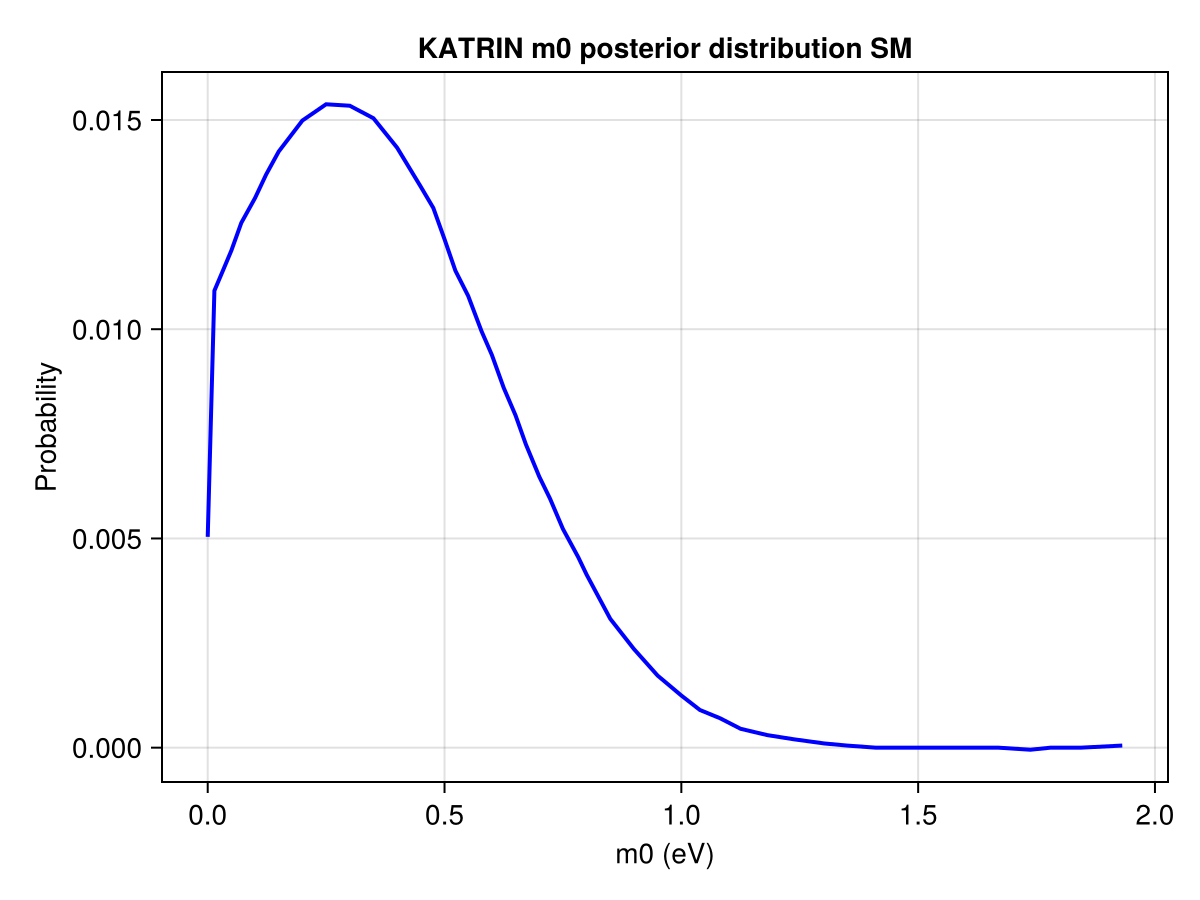

In [388]:
lines(posterior_sm[:, 1], posterior_sm[:, 2],
      axis=(xlabel="m0 (eV)", ylabel="Probability", title="KATRIN m0 posterior distribution SM"),
      color=:blue,
      linewidth=2)

In [389]:
posterior_data_m_nu=CSV.read("/home/sofialon/Newtrinos.jl/src/experiments/katrin/posterior_m_nu.csv", DataFrame)

Row,mass,probability
,Float64,Float64
1,0.0001,0.01
2,0.0141734,0.01095
3,0.031643,0.0114
4,0.05,0.0118896
5,0.0710193,0.01255
6,0.1,0.0131408
7,0.123327,0.0137
8,0.15,0.014251
9,0.2,0.0149911


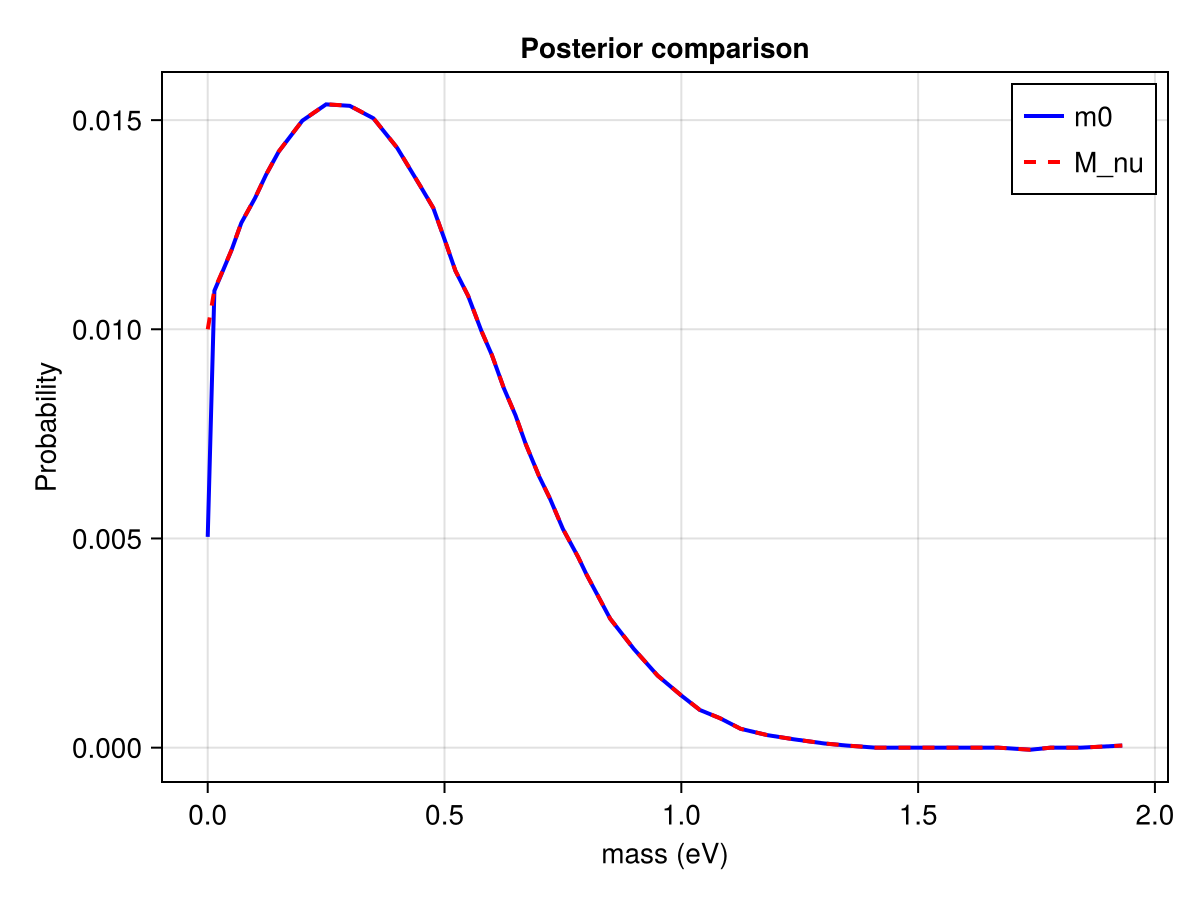

In [390]:

fig = Figure()
ax = Axis(fig[1, 1], xlabel="mass (eV)", ylabel="Probability", title="Posterior comparison")

lines!(ax, posterior_sm[:, 1], posterior_sm[:, 2], 
       color=:blue, linewidth=2, label="m0")
lines!(ax, posterior_data_m_nu[:, 1], posterior_data_m_nu[:, 2], 
       color=:red, linewidth=2, linestyle=:dash, label="M_nu")

axislegend(ax)
fig

In [391]:
posterior_NN=Newtrinos.katrin.get_posterior_NN(par, osc_cfg.flavour)

50×2 Matrix{Float64}:
 0.0         0.18469
 0.0         0.0130194
 0.0         0.00324722
 0.0157896   0.00668143
 0.0368089   0.00903508
 0.0657896   0.0106586
 0.0891162   0.0116458
 0.11579     0.0125208
 0.16579     0.0136489
 0.21579     0.0142879
 0.26579     0.0144422
 0.31579     0.0142898
 0.36579     0.0137122
 ⋮          
 1.31495     4.9362e-5
 1.37527     0.0
 1.40976     0.0
 1.45286     0.0
 1.48734     0.0
 1.52182     0.0
 1.57786     0.0
 1.63389     0.0
 1.70283    -4.95052e-5
 1.74596     0.0
 1.81062     0.0
 1.89685     4.95551e-5

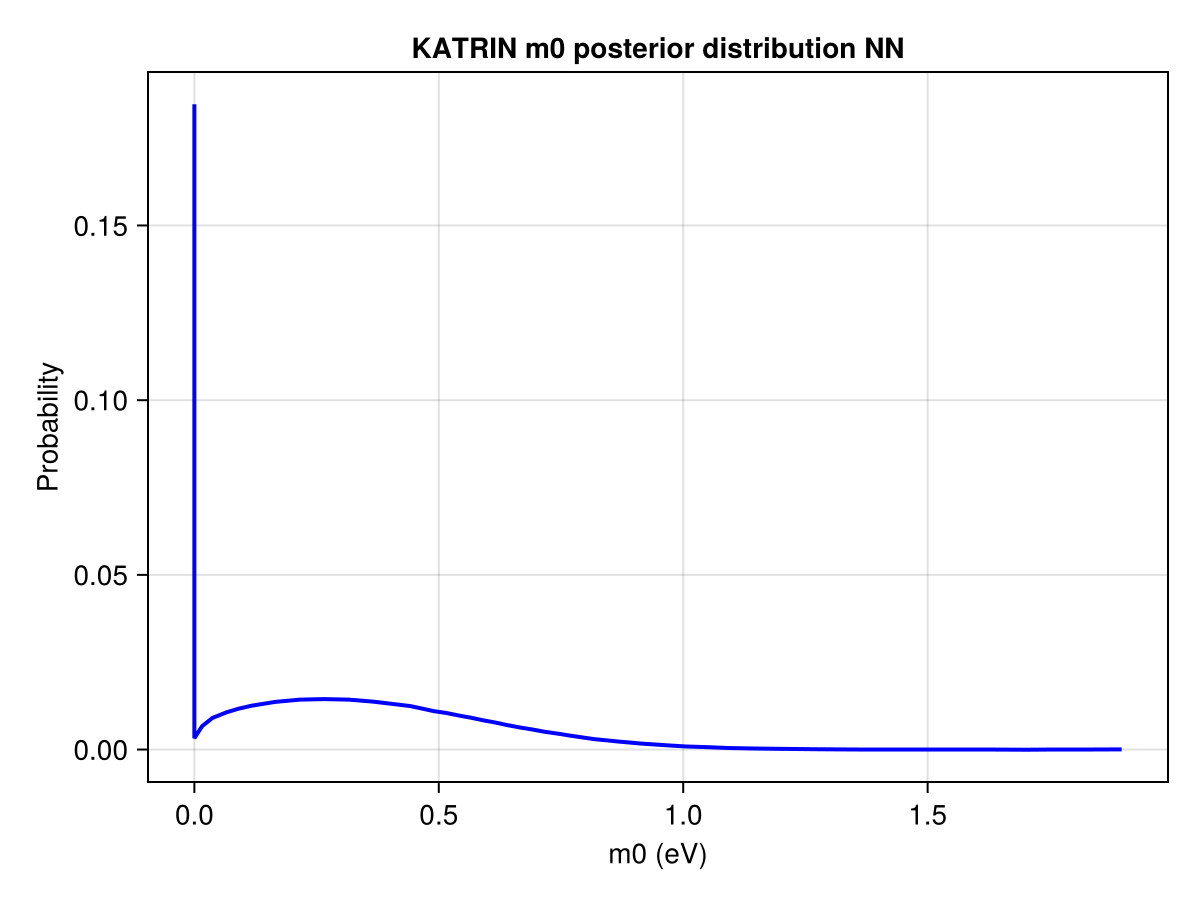

In [392]:
lines(posterior_NN[:, 1], posterior_NN[:, 2],
      axis=(xlabel="m0 (eV)", ylabel="Probability", title="KATRIN m0 posterior distribution NN"),
      color=:blue,
      linewidth=2)

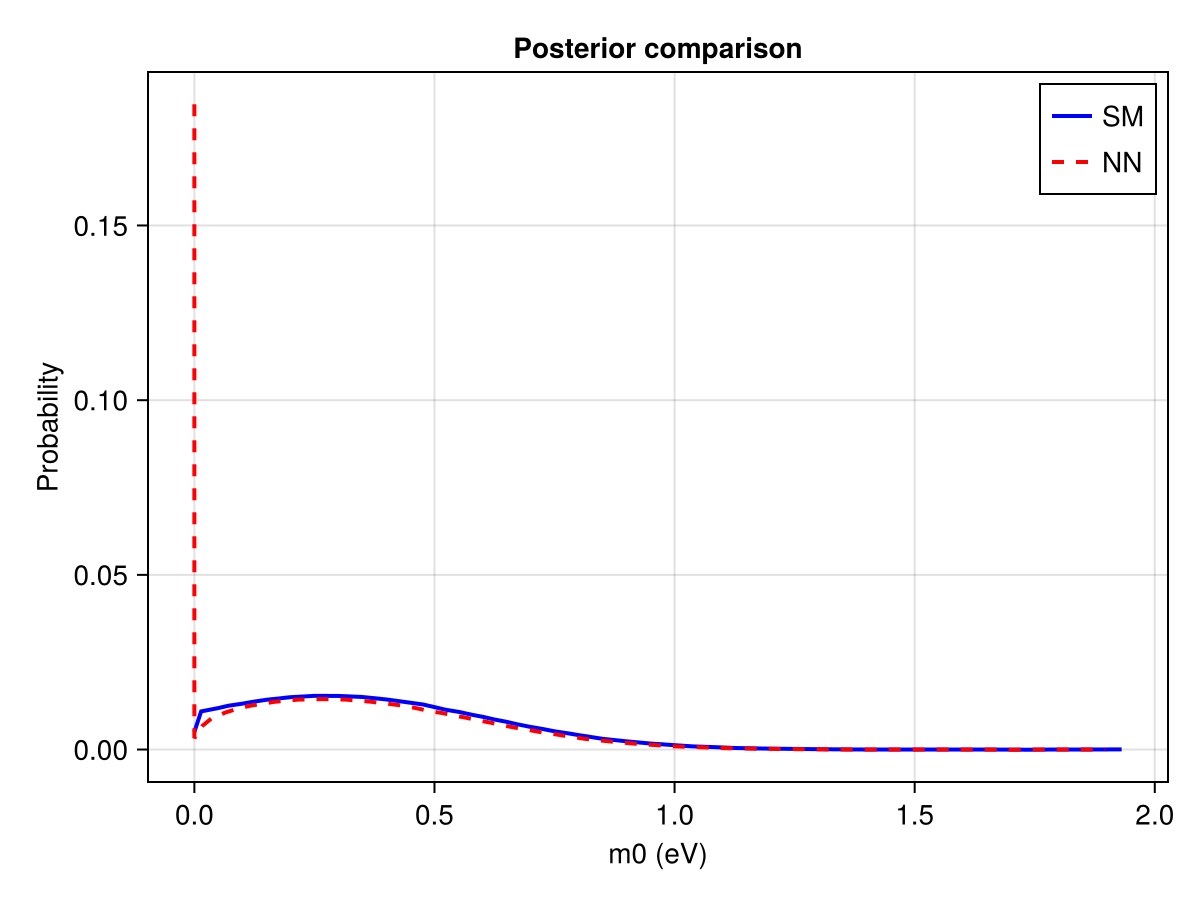

In [393]:

fig = Figure()
ax = Axis(fig[1, 1], xlabel="m0 (eV)", ylabel="Probability", title="Posterior comparison")

lines!(ax, posterior_sm[:, 1], posterior_sm[:, 2], 
       color=:blue, linewidth=2, label="SM")
lines!(ax, posterior_NN[:, 1], posterior_NN[:, 2], 
       color=:red, linewidth=2, linestyle=:dash, label="NN")

axislegend(ax)
fig

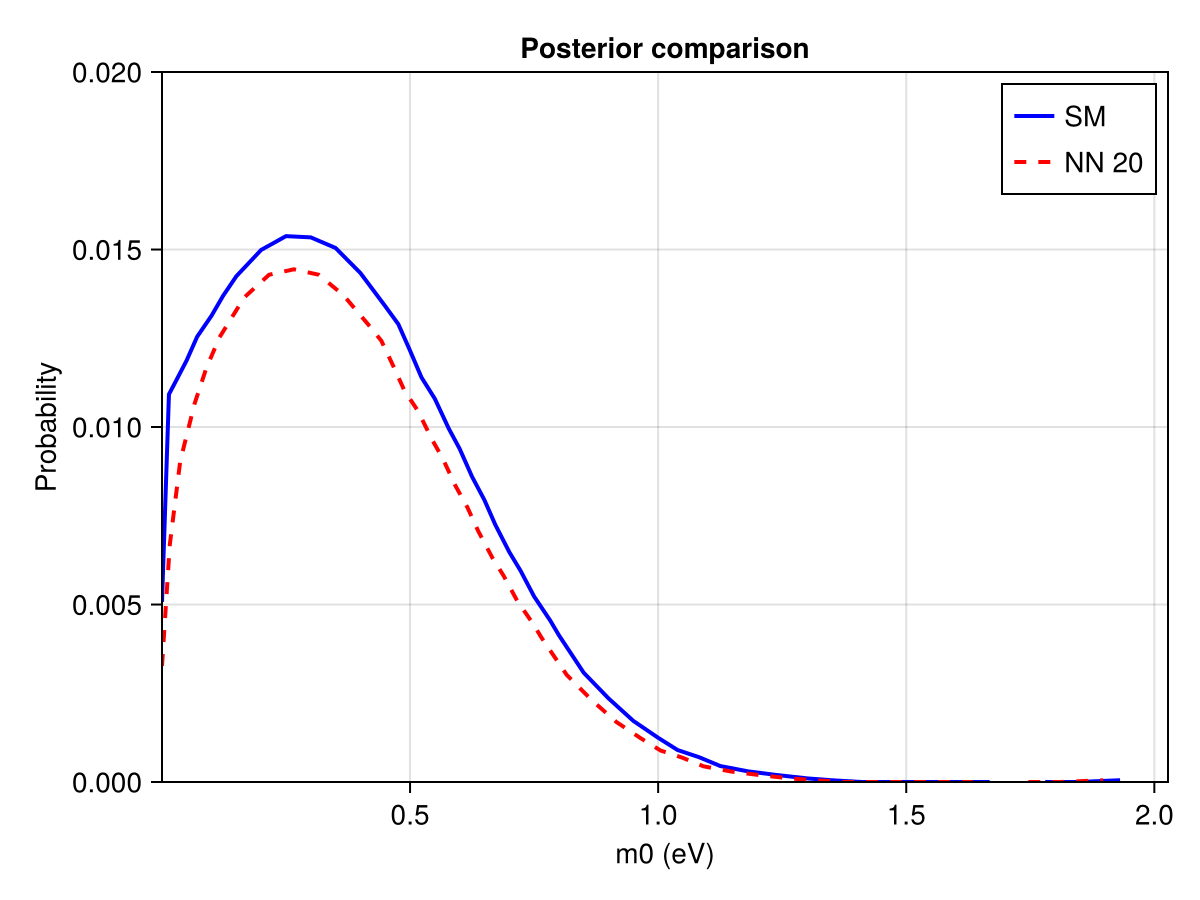

In [394]:
N=round(Int,par[:N])
fig = Figure()
ax = Axis(fig[1, 1], xlabel="m0 (eV)", ylabel="Probability", title="Posterior comparison")

lines!(ax, posterior_sm[:, 1], posterior_sm[:, 2], 
       color=:blue, linewidth=2, label="SM")
lines!(ax, posterior_NN[:, 1], posterior_NN[:, 2], 
       color=:red, linewidth=2, linestyle=:dash, label="NN $N")

xlims!(ax, 0.0001, nothing)
ylims!(ax, 0,0.02)  
axislegend(ax)
fig

Likelihood ratio and r-m0 estimation

In [408]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = (m₀=31,Δm²₃₁=31)  

modified_priors = (
    #N = par.N,
    m₀ =all_priors.m₀,
    #r = all_priors.r,
    
   
  

    Δm²₂₁ = par.Δm²₂₁,
    Δm²₃₁ = all_priors.Δm²₃₁,
    δCP = par.δCP,
    θ₁₂ = par.θ₁₂,
    θ₁₃ = all_priors.θ₁₃,
    θ₂₃ = par.θ₂₃
)
    


(m₀ = Uniform{Float64}(a=0.001, b=2.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = 0.8556288707523761)

In [396]:
likelihood = Newtrinos.generate_likelihood(experiments);

In [397]:

result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, par)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


NewtrinosResult((r = [1.0e-8, 0.033333343, 0.066666676, 0.100000009, 0.133333342, 0.166666675, 0.200000008, 0.233333341, 0.266666674, 0.30000000699999996  …  0.700000003, 0.733333336, 0.766666669, 0.8000000020000001, 0.8333333350000001, 0.866666668, 0.900000001, 0.9333333340000001, 0.966666667, 1.0], m₀ = [0.001, 0.06763333333333334, 0.13426666666666667, 0.20090000000000002, 0.26753333333333335, 0.33416666666666667, 0.40080000000000005, 0.46743333333333337, 0.5340666666666667, 0.6007  …  1.4002999999999999, 1.4669333333333332, 1.5335666666666667, 1.6002, 1.6668333333333334, 1.7334666666666667, 1.8001, 1.8667333333333334, 1.9333666666666667, 2.0]), (N = [20.0 20.0 … 20.0 20.0; 20.0 20.0 … 20.0 20.0; … ; 20.0 20.0 … 20.0 20.0; 20.0 20.0 … 20.0 20.0], Δm²₂₁ = [7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; … ; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5], Δm²₃₁ = [0.0024752999999999997 0.0024752999999999997 … 0.0024752999999999997 0.00247529

In [398]:
println("Scan result: ", result.values.log_posterior)

Scan result: Any[-0.09051932447149524 -0.0816094172666808 -0.05601912548126542 -0.015581403148900552 0.03666093103991108 0.09645519373781797 0.1583388369406178 0.21563944798725843 0.26047474955983774 0.28375259968360356 0.2751709917269535 0.22321805440143572 0.11517205176174738 -0.06289861679426445 -0.32613541652560163 -0.6908896773481117 -1.174722593834505 -1.7964052252143305 -2.5759184953739886 -3.5344531928567378 -4.694409970862673 -6.079399347248755 -7.714241704528783 -9.624967289873402 -11.838816215110134 -14.384238456723304 -17.29089385585413 -20.58965211830066 -24.312592814517817 -28.49300537961735 -33.16538911336788; -0.09049480385228459 -0.08012272857886749 -0.0504531174243823 -0.003974984490644484 0.05517975065923508 0.12123626300085144 0.18677682204850488 0.24274079185520103 0.27842463101265147 0.2814818926512733 0.23792322444018876 0.13211636858722553 -0.053213838161083826 -0.33698546451949807 -0.7397594846640756 -1.283739778232164 -1.9927731303224079 -2.8923492314947525 -4

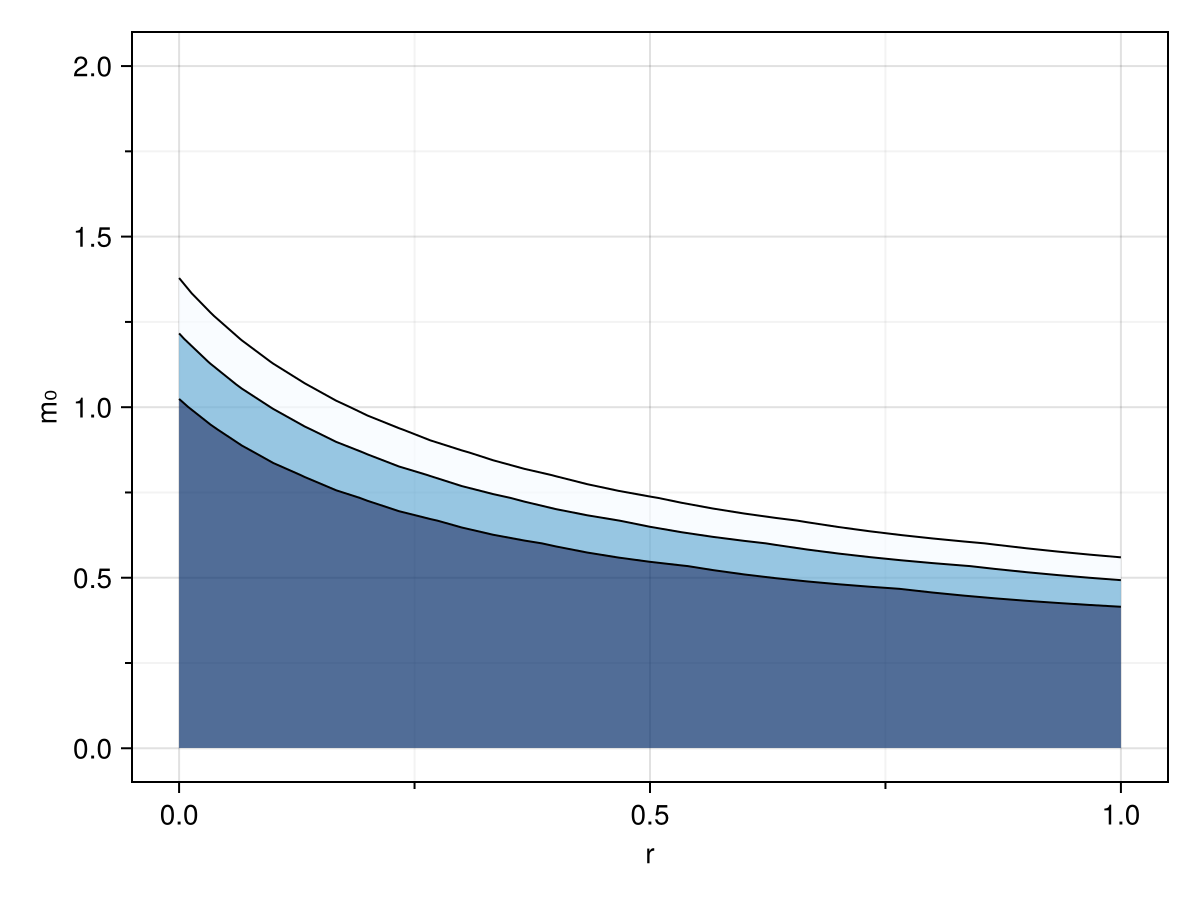

In [399]:
#plot and save the image
img = CairoMakie.plot(result)
display("image/png", img)

In [402]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = (m₀=31,Δm²₃₁=31)  

modified_priors = (
    #N = par.N,
    m₀ =all_priors.m₀,
    #r = all_priors.r,
    
   
  

    Δm²₂₁ = par.Δm²₂₁,
    Δm²₃₁ = all_priors.Δm²₃₁,
    δCP = par.δCP,
    θ₁₂ = par.θ₁₂,
    θ₁₃ = all_priors.θ₁₃,
    θ₂₃ = par.θ₂₃
    

)


(m₀ = Uniform{Float64}(a=0.001, b=2.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = 0.8556288707523761)

In [403]:
likelihood = Newtrinos.generate_likelihood(experiments_SM);

In [404]:
result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, par)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


NewtrinosResult((m₀ = [0.001, 0.06763333333333334, 0.13426666666666667, 0.20090000000000002, 0.26753333333333335, 0.33416666666666667, 0.40080000000000005, 0.46743333333333337, 0.5340666666666667, 0.6007  …  1.4002999999999999, 1.4669333333333332, 1.5335666666666667, 1.6002, 1.6668333333333334, 1.7334666666666667, 1.8001, 1.8667333333333334, 1.9333666666666667, 2.0], Δm²₃₁ = [0.002, 0.002033333333333333, 0.0020666666666666667, 0.0021, 0.0021333333333333334, 0.0021666666666666666, 0.0022, 0.0022333333333333333, 0.002266666666666667, 0.0023  …  0.0027, 0.0027333333333333333, 0.002766666666666667, 0.0028, 0.0028333333333333335, 0.0028666666666666667, 0.0029000000000000002, 0.0029333333333333334, 0.002966666666666667, 0.003]), (N = [20.0 20.0 … 20.0 20.0; 20.0 20.0 … 20.0 20.0; … ; 20.0 20.0 … 20.0 20.0; 20.0 20.0 … 20.0 20.0], r = [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0], Δm²₂₁ = [7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5;

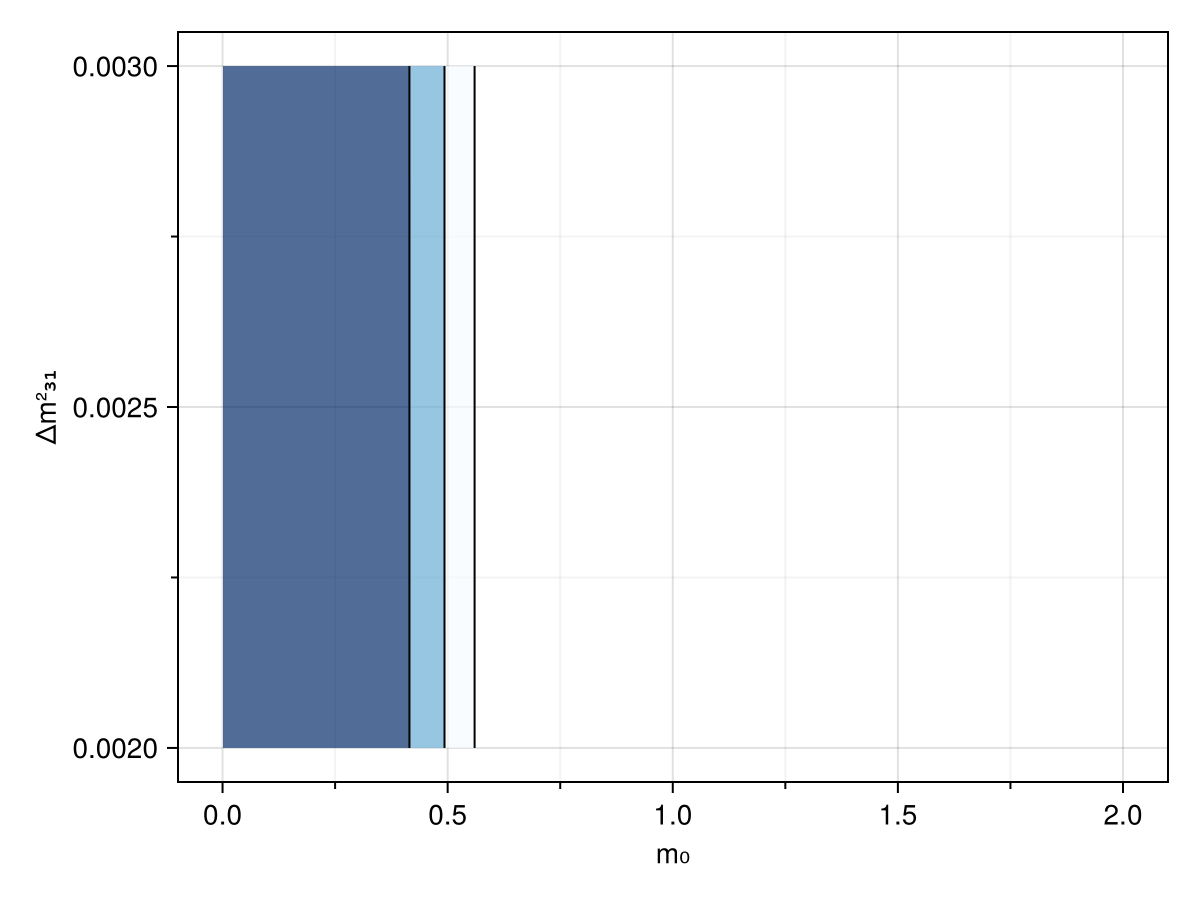

In [405]:
#plot and save the image
img = CairoMakie.plot(result)
display("image/png", img)

In [ ]:
likelihood=Newtrinos.katrin.create_katrin_likelihood_posteriors(experiments_SM, p)

1.3869356026596371

In [ ]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan =  [:r,:N]

modified_priors = (
    N = all_priors.N,
    m₀ =all_priors.m₀,
    r = all_priors.r,
    
   
  

    Δm²₂₁ = par.Δm²₂₁,
    Δm²₃₁ =par.Δm²₃₁,
    δCP = par.δCP,
    θ₁₂ = par.θ₁₂,
    θ₁₃ = par.θ₁₃,
    θ₂₃ = par.θ₂₃
    

)


(N = Uniform{Float64}(a=1.0, b=45.0), m₀ = Uniform{Float64}(a=0.001, b=2.0), r = Uniform{Float64}(a=1.0e-8, b=1.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [ ]:
function simple_neutrino_scan_selective(experiments, params, priors, vars_to_scan)
    
    results = Dict()
    
    for param_name in vars_to_scan
        if !haskey(priors, param_name)
            println("Warning: $param_name not found in priors")
            continue
        end
        
        prior = priors[param_name]
        
        # Extract range
        if isa(prior, Uniform)
            min_val, max_val = prior.a, prior.b
        elseif isa(prior, Tuple) && length(prior) == 2
            min_val, max_val = prior
        else
            println("Warning: Unsupported prior type for $param_name")
            continue
        end
        
        println("Scanning $param_name from $min_val to $max_val...")
        
        param_values = range(min_val, max_val, length=50)
        likelihoods = Float64[]
        
        for val in param_values
            try
                current_params = merge(params, NamedTuple{(param_name,)}((val,)))
                likelihood = Newtrinos.katrin.create_katrin_likelihood_posteriors(experiments, current_params)
                push!(likelihoods, likelihood)
            catch e
                println("Warning: Error for $param_name = $val: $e")
                push!(likelihoods, -Inf)
            end
        end
        
        results[param_name] = (values = collect(param_values), likelihoods = likelihoods)
    end
    
    return results
end

# Usage:

results = simple_neutrino_scan_selective(experiments_SM, p, modified_priors, vars_to_scan)


Scanning r from 1.0e-8 to 1.0...
Scanning N from 1.0 to 45.0...


Dict{Any, Any} with 2 entries:
  :N => (values = [1.0, 1.89796, 2.79592, 3.69388, 4.59184, 5.4898, 6.38776, 7.…
  :r => (values = [1.0e-8, 0.0204082, 0.0408163, 0.0612245, 0.0816327, 0.102041…

In [ ]:
using CairoMakie

function neutrino_scan_and_plot(experiments, params, priors, vars_to_scan)
    """
    Scan neutrino parameters and create appropriate plots
    - 1D scan: line plot
    - 2D scan: heatmap with color scale
    """
    
    # Validate inputs
    if length(vars_to_scan) > 2
        error("Maximum 2 parameters can be scanned simultaneously")
    end
    
    if length(vars_to_scan) == 0
        error("At least 1 parameter must be specified for scanning")
    end
    
    println("Scanning $(length(vars_to_scan)) parameter(s): $(vars_to_scan)")
    
    # Extract parameter information
    scan_params = Dict()
    for param_name in vars_to_scan
        if !haskey(priors, param_name)
            error("$param_name not found in priors")
        end
        
        prior = priors[param_name]
        
        # Extract range
        if isa(prior, Uniform)
            min_val, max_val = prior.a, prior.b
        elseif isa(prior, Tuple) && length(prior) == 2
            min_val, max_val = prior
        else
            error("Unsupported prior type for $param_name: $(typeof(prior))")
        end
        
        scan_params[param_name] = (min_val, max_val)
        println("Parameter $param_name: [$min_val, $max_val]")
    end
    
    # Perform scan based on number of parameters
    if length(vars_to_scan) == 1
        return scan_1d_and_plot(experiments, params, scan_params, vars_to_scan[1])
    else
        return scan_2d_and_plot(experiments, params, scan_params, vars_to_scan)
    end
end

function scan_1d_and_plot(experiments, params, scan_params, param_name)
    """1D parameter scan with line plot"""
    
    min_val, max_val = scan_params[param_name]
    param_values = range(min_val, max_val, length=100)
    likelihoods = Float64[]
    
    println("Scanning $param_name...")
    for (i, val) in enumerate(param_values)
        try
            current_params = merge(params, NamedTuple{(param_name,)}((val,)))
            likelihood = Newtrinos.katrin.create_katrin_likelihood_posteriors(experiments, current_params)
            push!(likelihoods, likelihood)
        catch e
            println("Warning: Error for $param_name = $val: $e")
            push!(likelihoods, -Inf)
        end
        
        if i % 20 == 0
            println("Progress: $i/$(length(param_values))")
        end
    end
    
    # Create 1D plot
    fig = Figure(resolution = (800, 600))
    ax = Axis(fig[1, 1], 
             xlabel = string(param_name),
             ylabel = "Log-likelihood",
             title = "1D Likelihood Scan: $param_name")
    
    lines!(ax, param_values, likelihoods, linewidth = 2)
    
    # Mark maximum
    max_idx = argmax(likelihoods)
    max_param = param_values[max_idx]
    max_llh = likelihoods[max_idx]
    
    scatter!(ax, [max_param], [max_llh], 
             color = :red, markersize = 10, marker = :circle)
    
    println("Maximum likelihood at $param_name = $max_param, LL = $max_llh")
    
    display(fig)
    
    return (
        param_values = param_values,
        likelihoods = likelihoods,
        max_param = max_param,
        max_likelihood = max_llh
    )
end

function scan_2d_and_plot(experiments, params, scan_params, param_names)
    """2D parameter scan with heatmap"""
    
    param1_name, param2_name = param_names[1], param_names[2]
    
    min1, max1 = scan_params[param1_name]
    min2, max2 = scan_params[param2_name]
    
    n_points = 50  # 50x50 grid
    param1_values = range(min1, max1, length=n_points)
    param2_values = range(min2, max2, length=n_points)
    
    likelihood_grid = Matrix{Float64}(undef, n_points, n_points)
    
    println("Scanning 2D grid: $param1_name × $param2_name...")
    total_points = n_points * n_points
    
    for (i, val1) in enumerate(param1_values)
        for (j, val2) in enumerate(param2_values)
            try
                current_params = merge(params, 
                                     NamedTuple{(param1_name, param2_name)}((val1, val2)))
                likelihood = Newtrinos.katrin.create_katrin_likelihood_posteriors(experiments, current_params)
                likelihood_grid[i, j] = likelihood
            catch e
                println("Warning: Error for ($param1_name=$val1, $param2_name=$val2): $e")
                likelihood_grid[i, j] = -Inf
            end
        end
        
        # Progress update
        completed = i * n_points
        println("Progress: $completed/$total_points ($(round(100*completed/total_points, digits=1))%)")
    end
    
    # Create 2D heatmap
    fig = Figure(resolution = (1000, 800))
    ax = Axis(fig[1, 1], 
             xlabel = string(param1_name),
             ylabel = string(param2_name),
             title = "2D Likelihood Scan: $param1_name × $param2_name")
    
    # Heatmap
    hm = heatmap!(ax, param1_values, param2_values, likelihood_grid',
                 colormap = :plasma)
    
    # Add contour lines
    contour!(ax, param1_values, param2_values, likelihood_grid',
             color = :white, linewidth = 1.5, levels = 8)
    
    # Colorbar
    Colorbar(fig[1, 2], hm, label = "Log-likelihood")
    
    # Find and mark maximum
    max_idx = argmax(likelihood_grid)
    max_i, max_j = Tuple(max_idx)
    max_param1 = param1_values[max_i]
    max_param2 = param2_values[max_j]
    max_llh = likelihood_grid[max_i, max_j]
    
    scatter!(ax, [max_param1], [max_param2], 
             color = :red, markersize = 15, marker = :star5)
    
    println("Maximum likelihood at ($param1_name=$max_param1, $param2_name=$max_param2), LL = $max_llh")
    
    display(fig)
    
    return (
        param1_values = param1_values,
        param2_values = param2_values,
        likelihood_grid = likelihood_grid,
        max_params = (param1_name => max_param1, param2_name => max_param2),
        max_likelihood = max_llh
    )
end

# Usage examples:
# 1D scan:
# results_1d = neutrino_scan_and_plot(experiments_SM, p, modified_priors, [:m0])

# 2D scan:
# results_2d = neutrino_scan_and_plot(experiments_SM, p, modified_priors, [:m0, :θ₁₃])

scan_2d_and_plot (generic function with 1 method)

Scanning 1 parameter(s): [:r]
Parameter r: [1.0e-8, 1.0]
Scanning r...
Progress: 20/100
Progress: 40/100
Progress: 60/100
Progress: 80/100
Progress: 100/100
Maximum likelihood at r = 1.0e-8, LL = 1.3869356026596371


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


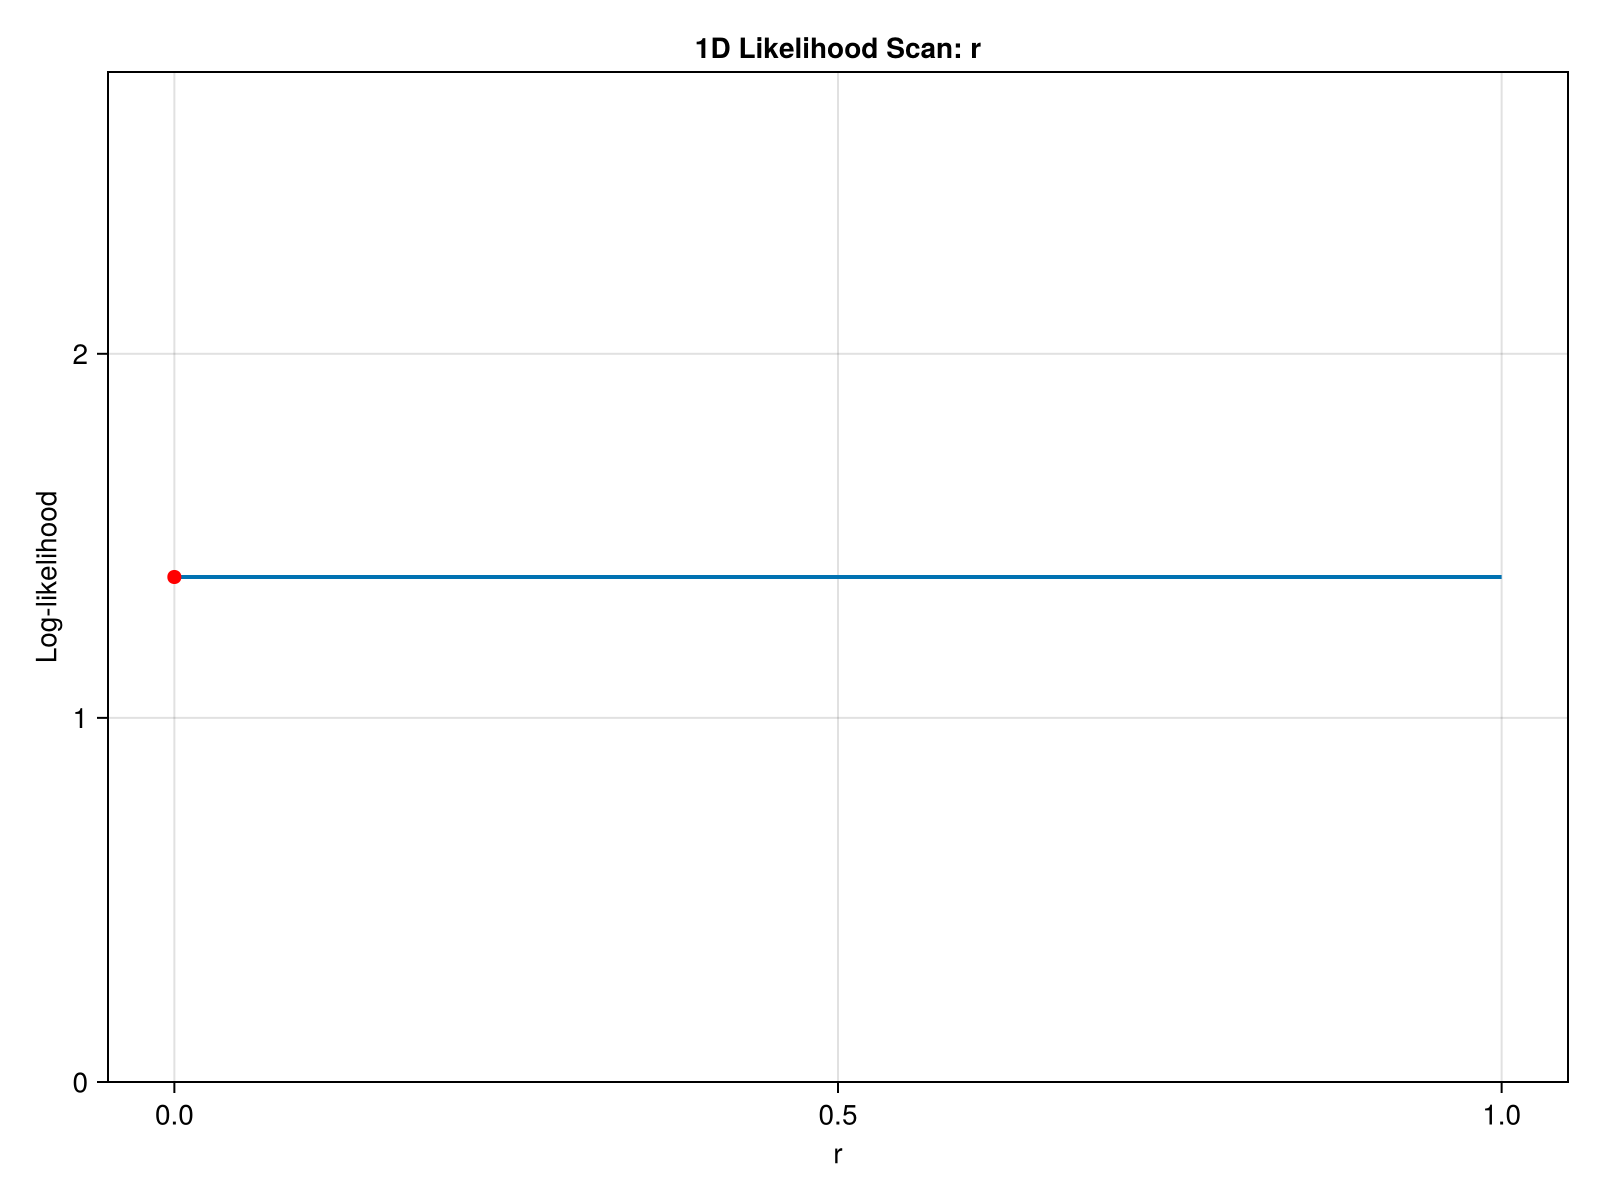

Scanning 2 parameter(s): [:r, :N]
Parameter r: [1.0e-8, 1.0]
Parameter N: [1.0, 45.0]
Scanning 2D grid: r × N...
Progress: 50/2500 (2.0%)
Progress: 100/2500 (4.0%)
Progress: 150/2500 (6.0%)
Progress: 200/2500 (8.0%)
Progress: 250/2500 (10.0%)
Progress: 300/2500 (12.0%)
Progress: 350/2500 (14.0%)
Progress: 400/2500 (16.0%)
Progress: 450/2500 (18.0%)
Progress: 500/2500 (20.0%)
Progress: 550/2500 (22.0%)
Progress: 600/2500 (24.0%)
Progress: 650/2500 (26.0%)
Progress: 700/2500 (28.0%)
Progress: 750/2500 (30.0%)
Progress: 800/2500 (32.0%)
Progress: 850/2500 (34.0%)
Progress: 900/2500 (36.0%)
Progress: 950/2500 (38.0%)
Progress: 1000/2500 (40.0%)
Progress: 1050/2500 (42.0%)
Progress: 1100/2500 (44.0%)
Progress: 1150/2500 (46.0%)
Progress: 1200/2500 (48.0%)
Progress: 1250/2500 (50.0%)
Progress: 1300/2500 (52.0%)
Progress: 1350/2500 (54.0%)
Progress: 1400/2500 (56.0%)
Progress: 1450/2500 (58.0%)
Progress: 1500/2500 (60.0%)
Progress: 1550/2500 (62.0%)
Progress: 1600/2500 (64.0%)
Progress: 1650/

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


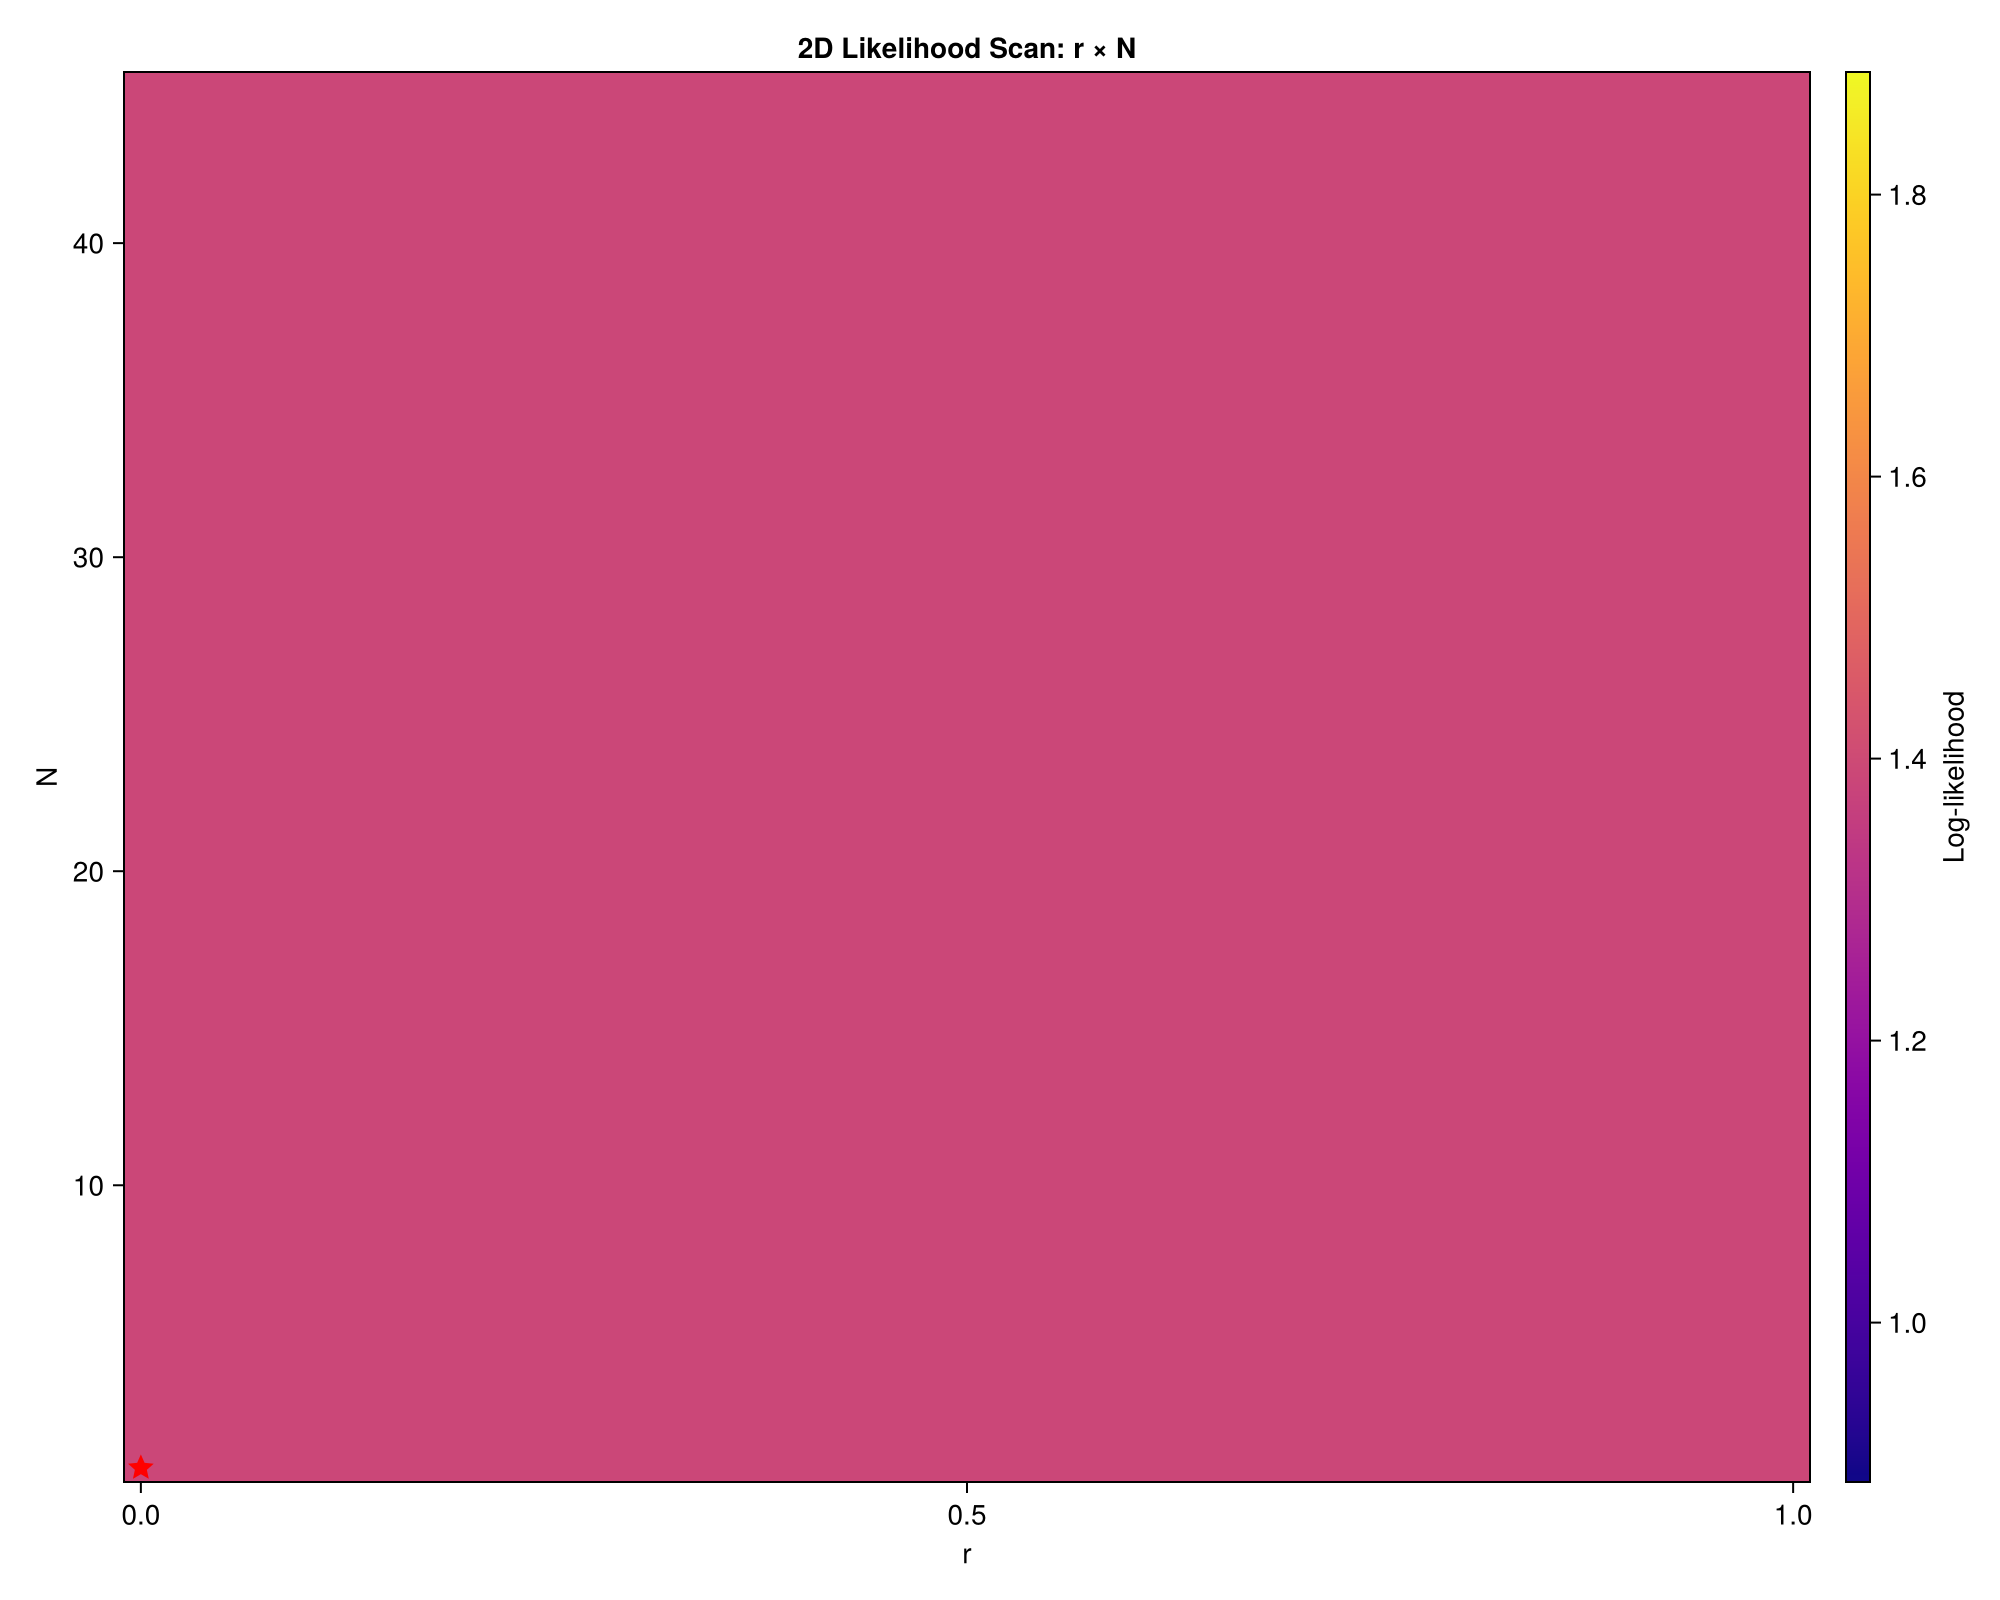

(param1_values = 1.0e-8:0.02040816306122449:1.0, param2_values = 1.0:0.8979591836734694:45.0, likelihood_grid = [1.3869356026596371 1.3869356026596371 … 1.3869356026596371 1.3869356026596371; 1.3869356026596371 1.3869356026596371 … 1.3869356026596371 1.3869356026596371; … ; 1.3869356026596371 1.3869356026596371 … 1.3869356026596371 1.3869356026596371; 1.3869356026596371 1.3869356026596371 … 1.3869356026596371 1.3869356026596371], max_params = (:r => 1.0e-8, :N => 1.0), max_likelihood = 1.3869356026596371)

In [ ]:
# 1D scan
results_1d = neutrino_scan_and_plot(experiments, par, modified_priors, [:r])

# 2D scan  
results_2d = neutrino_scan_and_plot(experiments, par, modified_priors, [:r, :N])